In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import keras as keras
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape, Cropping2D
from keras.models import Model, load_model
from keras.optimizers import Adam, RMSprop

c:\programdata\anaconda3\envs\animalai\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\programdata\anaconda3\envs\animalai\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\programdata\anaconda3\envs\animalai\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\programdata\anaconda3\envs\animalai\lib\site-packages\tensorf

In [3]:
original_array = [
    "3-15-1", "3-13-1", "3-13-2", "3-13-3", "3-14-1", "3-14-2", "3-14-3", "3-15-2", "3-15-3"
]

modified_array = ['' + elem + '.yml' for elem in original_array]

print(modified_array)


['3-15-1.yml', '3-13-1.yml', '3-13-2.yml', '3-13-3.yml', '3-14-1.yml', '3-14-2.yml', '3-14-3.yml', '3-15-2.yml', '3-15-3.yml']


In [37]:
## TEST FOR GPU AVAILABILITY

tf.config.list_physical_devices('GPU')
#tf.test.is_gpu_available()

AttributeError: module 'tensorflow._api.v1.config' has no attribute 'list_physical_devices'

In [19]:
# LOAD DATA / IMAGES

game_ID = 'permanence'
prototype_length = 20

save_dir = "../data/autoencoders/"+game_ID+"/"

In [20]:
data = np.array([np.load('../data/env_imgs/'+game_ID+'/npy/img_'+str(i)+'.npy') for i in np.arange(10000)])
#data = np.array([np.load('../saved_data/animalai_v1/env_imgs/npy/img_'+str(i)+'.npy') for i in np.arange(10000)])
#atari_data = np.load('../saved_data/atari/env_imgs/'+game_ID+'.npy')
print(data.shape)

(10000, 84, 84, 3)


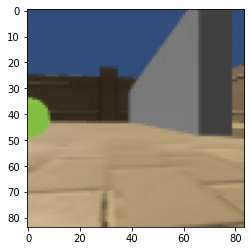

In [21]:
indx = 58

plt.imshow(data[indx])
plt.show()

In [22]:
data[indx].shape

(84, 84, 3)

In [23]:
#x_atari = np.reshape(atari_data, [atari_data.shape[0], atari_data.shape[1]*atari_data.shape[2]*atari_data.shape[3]])
x_animalai = np.reshape(data, [data.shape[0], int(data.shape[1]*data.shape[2]*data.shape[3])])
print(x_animalai.shape)

(10000, 21168)


Method 1: https://www.datatechnotes.com/2020/11/dimension-reduce-with-sparse-gaussian-and-pca-methods.html

In [24]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
from keras.datasets import mnist
from numpy import reshape
import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd

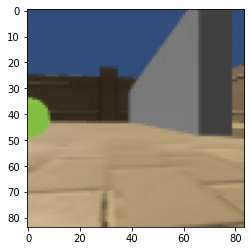

In [25]:
indx = 58

plt.imshow(data[indx])
plt.show()

In [26]:
x_animalai.shape[0]

10000

In [27]:
# Now with atari data:

# Gaussian random prejection on 2 components
grp = GaussianRandomProjection(n_components=prototype_length)
z = grp.fit_transform(x_animalai)

In [26]:
df_grp = pd.DataFrame()


df_grp["comp-1"] = z[:,0]
df_grp["comp-2"] = z[:,1]

NameError: name 'pd' is not defined

In [28]:
z.shape

(10000, 20)

In [29]:
# SAVE MODEL
model_name = 'grp'

filename = save_dir+game_ID+'_'+model_name+str(prototype_length)+'_animalai_v1.sav'
pickle.dump(grp, open(filename, 'wb'))

In [30]:
filename

'../data/autoencoders/permanence/permanence_grp20_animalai_v1.sav'

In [31]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

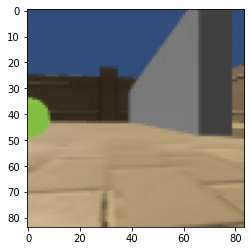

sample shape (84, 84, 3)


In [32]:
indx = 58
sample = data[indx]
plt.imshow(sample)
plt.show()
print('sample shape', sample.shape)

In [33]:
sample = sample.reshape((1,sample.shape[0]*sample.shape[1]*sample.shape[2]))
print('sample shape', sample.shape)

sample shape (1, 21168)


In [34]:
#print('sample shape', sample.shape)
prototype = loaded_model.transform(sample)[0]
prototype

array([ 12.80115725,  25.3042439 ,   0.41585957,   1.08592075,
        -2.41208849, -15.71914795, -42.07052533, -34.51076078,
       -12.47690385, -28.55411897,   4.64488715,  16.09643509,
       -19.61449281,   6.60221883, -19.43154867, -11.12732854,
        13.04278194,  17.66344544,   7.55771042,  -7.81780861])

In [35]:
prototype.shape[0]

20

In [55]:
rec_sample = loaded_model.inverse_transform(prototype.reshape((1, prototype.shape[0])))
rec_sample.shape

AttributeError: 'GaussianRandomProjection' object has no attribute 'inverse_transform'

In [56]:
rec_sample_reshape = rec_sample.reshape((84, 84, 3))
rec_sample_reshape.shape

NameError: name 'rec_sample' is not defined

In [57]:
plt.imshow(rec_sample_reshape)
plt.show()

NameError: name 'rec_sample_reshape' is not defined